<a href="https://colab.research.google.com/github/Gatoskint/Data-Analisys-Portfolio/blob/main/NutritionInPeru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of nutritional status in adults.**
### displayed in spanish
---

***Objective:***

To describe the nutritional status of the adult population aged 18 to 59 years through food consumption, anthropometric and biochemical indicators.

***Reference period of the questions:***

First phase: October 16 to December 28, 2017

Second phase: February 26 to May 13, 2018

In [ ]:
!pip install pyspark
!pip install streamlit

import streamlit as st
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import month, avg, col
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.5 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
#principal
spark = SparkSession.builder.appName("Analisis de nutricion y salud").getOrCreate()

google_sheets_url = "https://docs.google.com/spreadsheets/d/1V2smiaWZkQupMAkBOSaYxdvBxNahnwQN/export?format=xlsx"

adult_df = pd.read_excel(google_sheets_url, sheet_name='CAP 400A')

adult_spark_df = spark.createDataFrame(adult_df)

def spark_to_pandas(spark_df):
    return spark_df.toPandas()

In [ ]:
##Test para ver la informacion
adult_spark_df.show()

adult_pandas_df = spark_to_pandas(adult_spark_df)
print(adult_pandas_df.head())

spark_to_pandas(adult_spark_df)

adult_spark_df.describe().show()

adult_spark_df.printSchema()

+------------+--------+-----+------+---+---+-----------+----------+----------+---------+--------+---------------+------------------+------------------+------------------+-----------+-----------+-----------+-------------+--------------+---------------------+----------------------+--------------------+---------------------+-----------+-------------+-----------------------+----------------+-----------+-------------+-----------------------+----------------+-----------+-------------+-----------------------+----------------+-----------+-------------+-----------------------+----------------+-----------+-------------+-----------------------+----------------+-----------+-------------+-----------------------+----------------+-----------+-------------+-----------------------+----------------+----------------------+----------------+-----------------+------------+--------------------+---------------------+------------------------+------------------------+------------------------+-------------------

In [ ]:
#Conversion a int

adult_spark_df = adult_spark_df \
    .withColumn("406_EDAD_AÑOS", col("406_EDAD_AÑOS").cast("int")) \
    .withColumn("401_SEXO", col("401_SEXO").cast("int")) \
    .withColumn("407_PESO_BRUTO_ENTERO", col("407_PESO_BRUTO_ENTERO").cast("int")) \
    .withColumn("407_PESO_BRUTO_DECIMAL", col("407_PESO_BRUTO_DECIMAL").cast("float")) \
    .withColumn("408_PESO_NETO_ENTERO", col("408_PESO_NETO_ENTERO").cast("int")) \
    .withColumn("408_PESO_NETO_DECIMAL", col("408_PESO_NETO_DECIMAL").cast("float")) \
    .withColumn("410_TALLA_ENTERO", col("410_TALLA_ENTERO").cast("int")) \
    .withColumn("410_TALLA_DECIMAL", col("410_TALLA_DECIMAL").cast("float")) \
    .withColumn("424_RESULTADO_PESO", col("424_RESULTADO_PESO").cast("float")) \
    .withColumn("424_RESULTADO_TALLA", col("424_RESULTADO_TALLA").cast("float")) \
    .withColumn("415_PRIMERA_MEDIDA_SISTOLICA", col("415_PRIMERA_MEDIDA_SISTOLICA").cast("int")) \
    .withColumn("409_PESO_PRENDAS_TOTAL", col("409_PESO_PRENDAS_TOTAL").cast("int")) \
    .withColumn("415_PRIMERA_MEDIDA_DIASTOLICA", col("415_PRIMERA_MEDIDA_DIASTOLICA").cast("int")) \
    .withColumn("416_SEGUNDA_MEDIDA_ SISTOLICA", col("416_SEGUNDA_MEDIDA_ SISTOLICA").cast("int")) \
    .withColumn("416_SEGUNDA_MEDIDA_ DIASTOLICA", col("416_SEGUNDA_MEDIDA_ DIASTOLICA").cast("int")) \
    .withColumn("417_TERCERA_MEDIDA_SISTOLICA", col("417_TERCERA_MEDIDA_SISTOLICA").cast("int")) \
    .withColumn("417_TERCERA_MEDIDA_DIASTOLICA", col("417_TERCERA_MEDIDA_DIASTOLICA").cast("int")) \
    .withColumn("418_RESULTADO_FINAL_SISTOLICA", col("418_RESULTADO_FINAL_SISTOLICA").cast("int")) \
    .withColumn("418_RESULTADO_FINAL_DIASTOLICA", col("418_RESULTADO_FINAL_DIASTOLICA").cast("int")) \
    .withColumn("423_GLUCOSA_DECIMAL", col("423_GLUCOSA_DECIMAL").cast("float")) \
    .withColumn("423_GLUCOSA_ENTERO", col("423_GLUCOSA_ENTERO").cast("int")) \
    .withColumn("424_RESULTADO_GLUCOSA", col("424_RESULTADO_GLUCOSA").cast("float")) \
    .withColumn("419_HEMOGLOBINA_AÑO", col("419_HEMOGLOBINA_AÑO").cast("float")) \
    .withColumn("420_RESULTADO_HEMOGLOBINA_ENTERO", col("420_RESULTADO_HEMOGLOBINA_ENTERO").cast("int")) \
    .withColumn("420_RESULTADO_HEMOGLOBINA_DECIMAL", col("420_RESULTADO_HEMOGLOBINA_DECIMAL").cast("float")) \
    .withColumn("424_RESULTADO_PERIMETRO_ABDOMINAL", col("424_RESULTADO_PERIMETRO_ABDOMINAL").cast("float"))


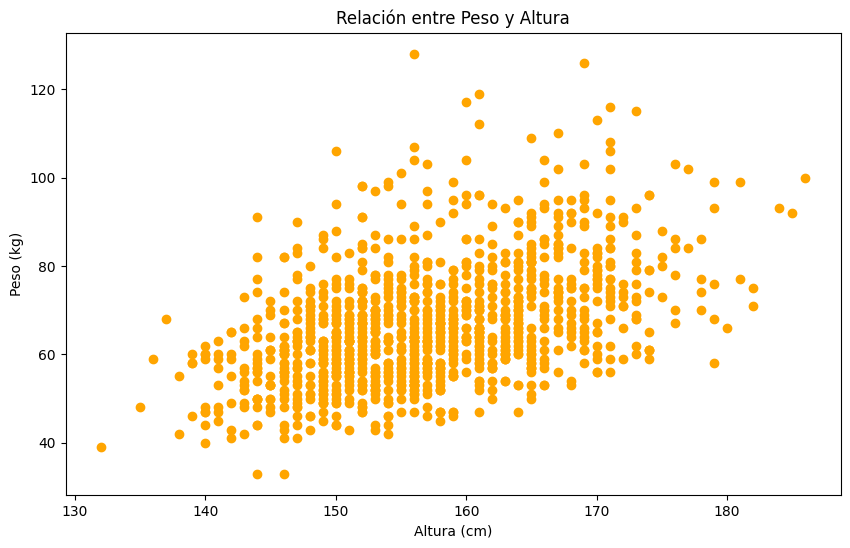

In [ ]:
# Correlacion entre el peso y la altura
adult_spark_df = adult_spark_df.filter(adult_spark_df["408_PESO_NETO_ENTERO"] > 0)
adult_spark_df = adult_spark_df.filter(adult_spark_df["410_TALLA_ENTERO"] > 0)
weight_height_data = adult_spark_df.select("408_PESO_NETO_ENTERO", "410_TALLA_ENTERO").dropna()
weight_height_data_pd = spark_to_pandas(weight_height_data)

plt.figure(figsize=(10, 6))
plt.scatter(weight_height_data_pd["410_TALLA_ENTERO"], weight_height_data_pd["408_PESO_NETO_ENTERO"], color='orange')
plt.title('Relación entre Peso y Altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()

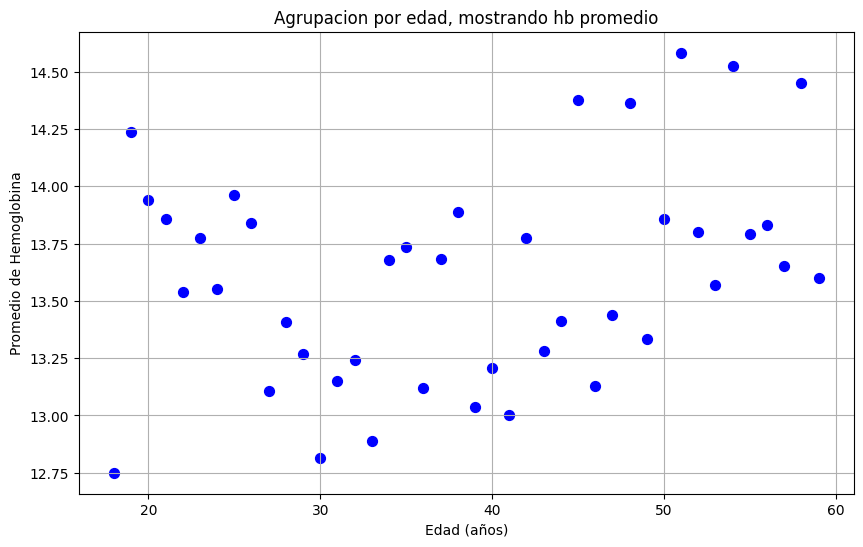

In [ ]:
#agrupacion por edad y promedio de hb
#columna de edad
adult_spark_df = adult_spark_df.filter(adult_spark_df["420_RESULTADO_HEMOGLOBINA_ENTERO"] > 0)
adult_spark_df = adult_spark_df.filter(adult_spark_df["406_EDAD_AÑOS"] > 0)
adult_spark_df = adult_spark_df.withColumn("rango_edad",
                                           F.when((adult_spark_df["406_EDAD_AÑOS"] >= 20) & (adult_spark_df["406_EDAD_AÑOS"] < 30), "20-29")
                                           .when((adult_spark_df["406_EDAD_AÑOS"] >= 30) & (adult_spark_df["406_EDAD_AÑOS"] < 40), "30-39")
                                           .when((adult_spark_df["406_EDAD_AÑOS"] >= 40) & (adult_spark_df["406_EDAD_AÑOS"] < 60), "40-59")
                                           .otherwise("60+"))
#agrupa por edad y calcula promedio
age_hemoglobin_relation = adult_spark_df.groupBy("406_EDAD_AÑOS").agg(F.avg("420_RESULTADO_HEMOGLOBINA_ENTERO").alias("promedio_hemoglobina"))
age_hemoglobin_relation_pd = spark_to_pandas(age_hemoglobin_relation)

plt.figure(figsize=(10, 6))
plt.scatter(age_hemoglobin_relation_pd["406_EDAD_AÑOS"], age_hemoglobin_relation_pd["promedio_hemoglobina"], color='blue', s=50)
plt.title('Agrupacion por edad, mostrando hb promedio')
plt.xlabel('Edad (años)')
plt.ylabel('Promedio de Hemoglobina')
plt.grid(True)
plt.show()

Prevalencia de anemia: 14.81%
Proporción de hipertensión: 3.96%


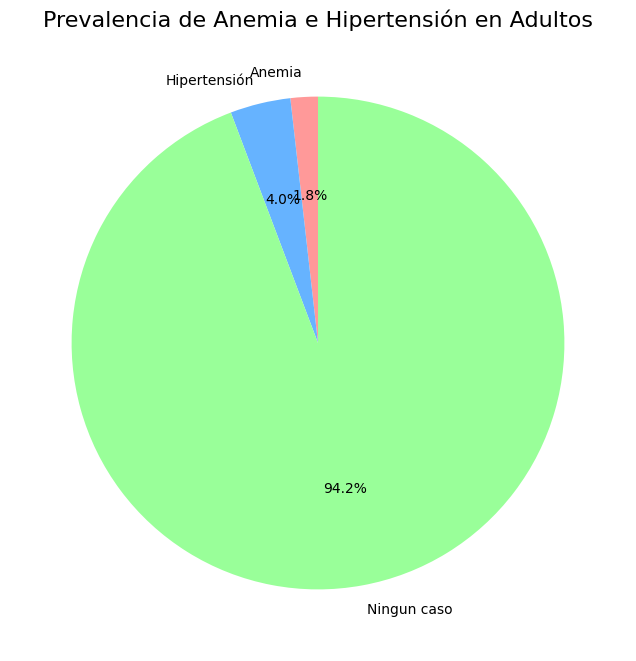

In [ ]:
#prevalencia de anemia en adultos
anemia_threshold_male = 13  # g/dL hombres
anemia_threshold_female = 12  # g/dL mujeres

#clasifica segun hb
adult_spark_df = adult_spark_df.withColumn("anemia",
                                           F.when((adult_spark_df["401_SEXO"] == 2) & (adult_spark_df["420_RESULTADO_HEMOGLOBINA_ENTERO"] < anemia_threshold_female), 1)
                                           .when((adult_spark_df["401_SEXO"] == 1) & (adult_spark_df["420_RESULTADO_HEMOGLOBINA_ENTERO"] < anemia_threshold_male), 1)
                                           .otherwise(0))

# Calcular prevalencia de anemia
anemia_prevalence = adult_spark_df.filter(adult_spark_df["anemia"] == 1).count() / adult_spark_df.count()
print(f'Prevalencia de anemia: {anemia_prevalence * 100:.2f}%')

systolic_threshold = 140  # mmHg
diastolic_threshold = 90  # mmHg

#calcular proporcion de hipertension
adult_spark_df = adult_spark_df.withColumn("hipertension",
                                           F.when((adult_spark_df["418_RESULTADO_FINAL_SISTOLICA"] > systolic_threshold) |
                                                  (adult_spark_df["418_RESULTADO_FINAL_DIASTOLICA"] > diastolic_threshold), 1)
                                           .otherwise(0))

hypertension_proportion = adult_spark_df.filter(adult_spark_df["hipertension"] == 1).count() / adult_spark_df.count()
print(f'Proporción de hipertensión: {hypertension_proportion * 100:.2f}%')

# calcula prevalencia de anemia y la proporción de hipertension para la grafica de pastel
# crear la columna de anemia
adult_spark_df = adult_spark_df.withColumn(
    "anemia",
    F.when((adult_spark_df["401_SEXO"] == 0) &
           (adult_spark_df["420_RESULTADO_HEMOGLOBINA_ENTERO"] < anemia_threshold_female), 1)
    .when((adult_spark_df["401_SEXO"] == 1) &
          (adult_spark_df["420_RESULTADO_HEMOGLOBINA_ENTERO"] < anemia_threshold_male), 1)
    .otherwise(0)
)
# columna hipertension
adult_spark_df = adult_spark_df.withColumn(
    "hipertension",
    F.when((adult_spark_df["418_RESULTADO_FINAL_SISTOLICA"] > systolic_threshold) |
           (adult_spark_df["418_RESULTADO_FINAL_DIASTOLICA"] > diastolic_threshold), 1)
    .otherwise(0)
)

# cuenta el total
total_cases = adult_spark_df.count()
# cuenta casos anemia
anemia_cases = adult_spark_df.filter(adult_spark_df["anemia"] == 1).count()
# cuenta casos hypertension
hypertension_cases = adult_spark_df.filter(adult_spark_df["hipertension"] == 1).count()
# otros es la logica de anemia e hipertension - total
other_cases = total_cases - (anemia_cases + hypertension_cases)
labels = ['Anemia', 'Hipertensión', 'Ningun caso']
# se separa para el grafico
sizes = [anemia_cases, hypertension_cases, other_cases]
# se asigna color
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Prevalencia de Anemia e Hipertensión en Adultos', fontsize=16)
plt.show()

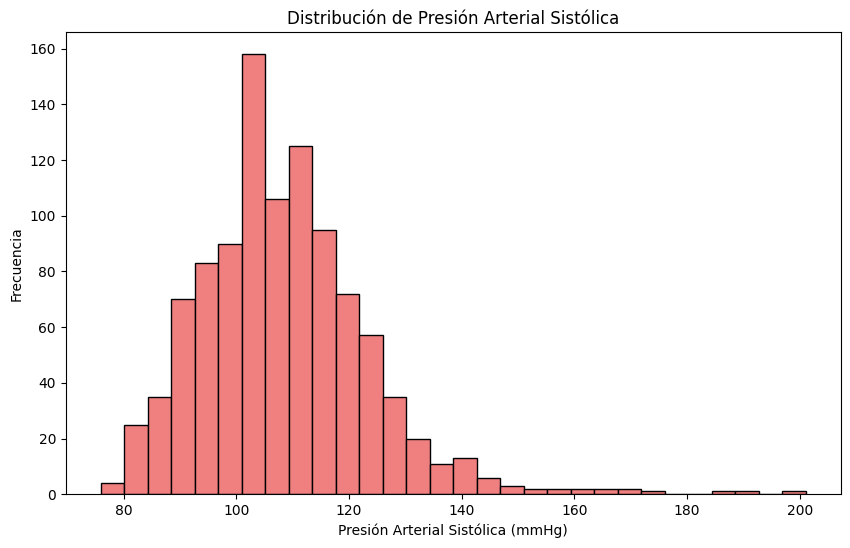

Proporcion de riesgo cardiovascular elevado: 34.34%


In [ ]:
# Presion arterial sistólica
adult_spark_df = adult_spark_df.filter(adult_spark_df["418_RESULTADO_FINAL_SISTOLICA"] > 0)
pressure_data = adult_spark_df.select("418_RESULTADO_FINAL_SISTOLICA").dropna() #limpia datos
pressure_data_pd = spark_to_pandas(pressure_data)

plt.figure(figsize=(10, 6))
plt.hist(pressure_data_pd["418_RESULTADO_FINAL_SISTOLICA"], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribución de Presión Arterial Sistólica')
plt.xlabel('Presión Arterial Sistólica (mmHg)')
plt.ylabel('Frecuencia')
plt.show()

# riesgo cardiovascular datos
risk_threshold_male = 102
risk_threshold_female = 88

# crea columna
adult_spark_df = adult_spark_df.withColumn("riesgo_cardiovascular",
                                           F.when((adult_spark_df["401_SEXO"] == 1) & (adult_spark_df["413_PERIMETRO_ENTERO"] > risk_threshold_female), 1)
                                           .when((adult_spark_df["401_SEXO"] == 2) & (adult_spark_df["413_PERIMETRO_ENTERO"] > risk_threshold_male), 1)
                                           .otherwise(0))

cv_risk_proportion = adult_spark_df.filter(adult_spark_df["riesgo_cardiovascular"] == 1).count() / adult_spark_df.count() #contar
print(f'Proporcion de riesgo cardiovascular elevado: {cv_risk_proportion * 100:.2f}%')

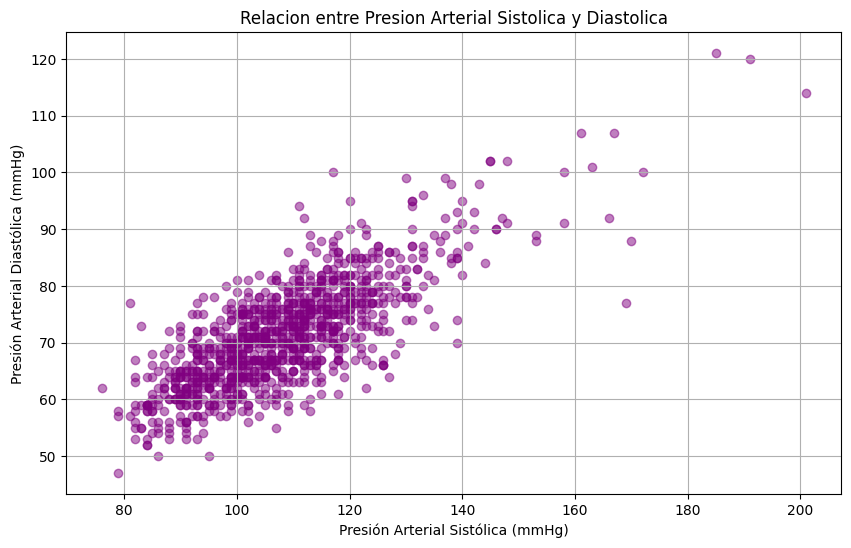

In [ ]:
#relacion entre presión arterial sistolica y diastolica
blood_pressure_data = adult_spark_df.select("418_RESULTADO_FINAL_SISTOLICA", "418_RESULTADO_FINAL_DIASTOLICA").dropna()

blood_pressure_data_pd = spark_to_pandas(blood_pressure_data)

plt.figure(figsize=(10, 6))
plt.scatter(blood_pressure_data_pd["418_RESULTADO_FINAL_SISTOLICA"], blood_pressure_data_pd["418_RESULTADO_FINAL_DIASTOLICA"], color='purple', alpha=0.5)
plt.title('Relacion entre Presion Arterial Sistolica y Diastolica')
adult_spark_df = adult_spark_df.filter(adult_spark_df["418_RESULTADO_FINAL_SISTOLICA"] > 0)
adult_spark_df = adult_spark_df.filter(adult_spark_df["418_RESULTADO_FINAL_DIASTOLICA"] > 0)
plt.xlabel('Presión Arterial Sistólica (mmHg)')
plt.ylabel('Presión Arterial Diastólica (mmHg)')
plt.grid(True)
plt.show()

  rango_edad  casos_hipertension  casos_diabetes
0      30-39                   6              23
1      20-29                   4              25
3      40-59                  31              50


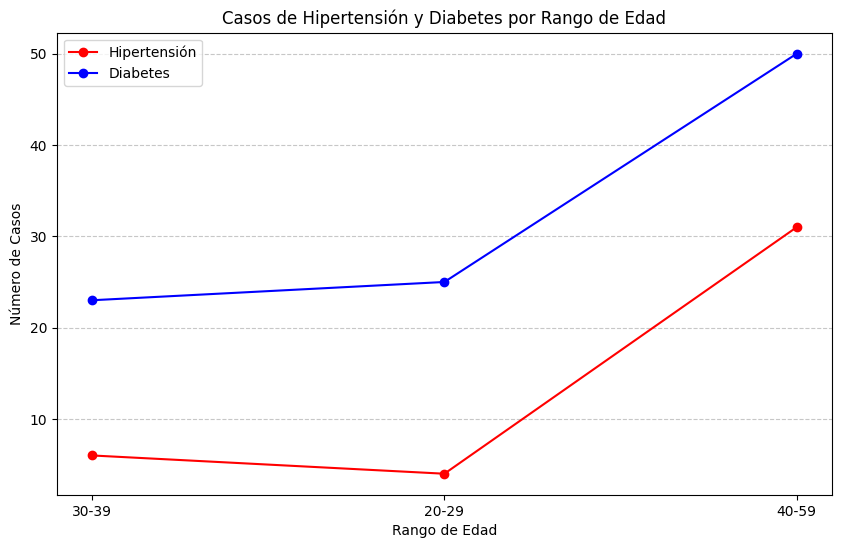

In [ ]:
# columna hipertension
adult_spark_df = adult_spark_df.withColumn("hipertension",
                                           F.when((adult_spark_df["418_RESULTADO_FINAL_SISTOLICA"] > 140) |
                                                  (adult_spark_df["418_RESULTADO_FINAL_DIASTOLICA"] > 90), 1)
                                           .otherwise(0))

# columna diabetes - umbral de glucosa > 126 mg/dL para diabetes
adult_spark_df = adult_spark_df.withColumn("diabetes",
                                           F.when(adult_spark_df["423_GLUCOSA_ENTERO"] > 126, 1)
                                           .otherwise(0))

# columna rango edad
adult_spark_df = adult_spark_df.withColumn("rango_edad",
                                           F.when((adult_spark_df["406_EDAD_AÑOS"] > 20) & (adult_spark_df["406_EDAD_AÑOS"] < 30), "20-29")
                                           .when((adult_spark_df["406_EDAD_AÑOS"] >= 30) & (adult_spark_df["406_EDAD_AÑOS"] < 40), "30-39")
                                           .when((adult_spark_df["406_EDAD_AÑOS"] >= 40) & (adult_spark_df["406_EDAD_AÑOS"] < 60), "40-59")
                                           .otherwise("60+"))

# Contar casos por edad
age_health_relation = adult_spark_df.groupBy("rango_edad").agg(
    F.sum("hipertension").alias("casos_hipertension"),
    F.sum("diabetes").alias("casos_diabetes")
)

age_health_relation_pd = spark_to_pandas(age_health_relation)
age_health_relation_pd = age_health_relation_pd[age_health_relation_pd["rango_edad"] != "60+"]
print(age_health_relation_pd)

plt.figure(figsize=(10, 6))
plt.plot(age_health_relation_pd["rango_edad"], age_health_relation_pd["casos_hipertension"], label="Hipertensión", marker='o', color='red')
plt.plot(age_health_relation_pd["rango_edad"], age_health_relation_pd["casos_diabetes"], label="Diabetes", marker='o', color='blue')
plt.title('Casos de Hipertensión y Diabetes por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Casos')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

           salud_categoria  total
0                 Diabetes     97
1             Hipertensión     35
2  Hipertensión y Diabetes      7
3   No cuentan con ninguno    883


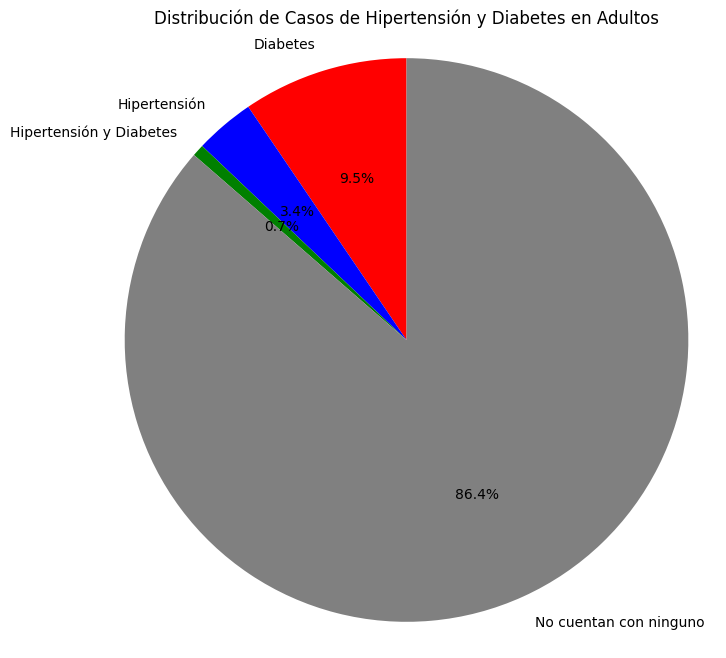

In [ ]:
# grafico pastel - TOTAL de casos
adult_spark_df = adult_spark_df.withColumn("hipertension",
                                           F.when((adult_spark_df["418_RESULTADO_FINAL_SISTOLICA"] > 140) |
                                                  (adult_spark_df["418_RESULTADO_FINAL_DIASTOLICA"] > 90), 1)
                                           .otherwise(0))

# umbral de glucosa > 126 mg/dL para diabetes
adult_spark_df = adult_spark_df.withColumn("diabetes",
                                           F.when(adult_spark_df["423_GLUCOSA_ENTERO"] > 126, 1)
                                           .otherwise(0))

# sort
adult_spark_df = adult_spark_df.withColumn("salud_categoria",
                                           F.when((adult_spark_df["hipertension"] == 1) & (adult_spark_df["diabetes"] == 1), "Hipertensión y Diabetes")
                                           .when(adult_spark_df["hipertension"] == 1, "Hipertensión")
                                           .when(adult_spark_df["diabetes"] == 1, "Diabetes")
                                           .otherwise("No cuentan con ninguno"))

# de casos
health_summary = adult_spark_df.groupBy("salud_categoria").agg(F.count("*").alias("total"))
health_summary_pd = spark_to_pandas(health_summary)

print(health_summary_pd)

plt.figure(figsize=(8, 8))
plt.pie(health_summary_pd["total"], labels=health_summary_pd["salud_categoria"], autopct='%1.1f%%', startangle=90, colors=['red', 'blue', 'green', 'gray'])
plt.title('Distribución de Casos de Hipertensión y Diabetes en Adultos')
plt.axis('equal')
plt.show()

Proporción de diabetes: 10.18%
Proporcion de hiperglicemia: 20.06%
  rango_edad  promedio_gluc
0      30-39      96.629771
1      20-29      98.440367
3      40-59      97.839248


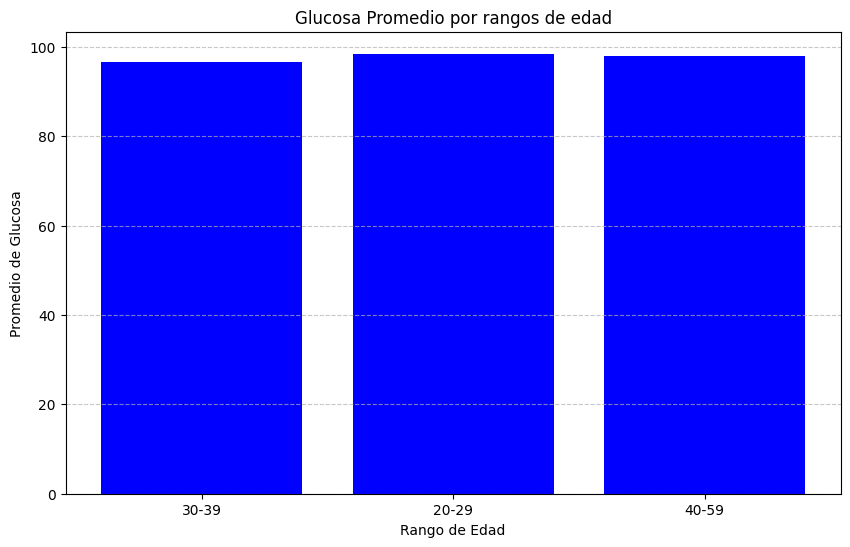

In [ ]:
#porcentaje proporcion de diabetes e hiperglicemia en la poblacion de la muestra
hyperglycemia_threshold = 110  # mg/dL
diabetes_threshold = 126

#diabetes
adult_spark_df = adult_spark_df.withColumn("diabetes",
                                           F.when(adult_spark_df["423_GLUCOSA_ENTERO"] > diabetes_threshold, 1)
                                           .otherwise(0))
diabetes_proportion = adult_spark_df.filter(adult_spark_df["diabetes"] == 1).count() / adult_spark_df.count()
print(f'Proporción de diabetes: {diabetes_proportion * 100:.2f}%')

#hiperglicemia
adult_spark_df = adult_spark_df.withColumn("hiperglicemia",
                                           F.when((adult_spark_df["423_GLUCOSA_ENTERO"] > hyperglycemia_threshold) &
                                                  (adult_spark_df["423_GLUCOSA_ENTERO"] <= diabetes_threshold), 1)
                                           .otherwise(0))

hyperglycemia_proportion = adult_spark_df.filter(adult_spark_df["hiperglicemia"] == 1).count() / adult_spark_df.count()
print(f'Proporcion de hiperglicemia: {hyperglycemia_proportion * 100:.2f}%')
# GLUCOSA PROMEDIO POR RANGOS DE EDAD
# Filtrar
adult_spark_df = adult_spark_df.dropna(subset=["406_EDAD_AÑOS", "423_GLUCOSA_ENTERO"])

adult_spark_df = adult_spark_df.withColumn("rango_edad",
                                           F.when((adult_spark_df["406_EDAD_AÑOS"] > 20) & (adult_spark_df["406_EDAD_AÑOS"] < 30), "20-29")
                                           .when((adult_spark_df["406_EDAD_AÑOS"] >= 30) & (adult_spark_df["406_EDAD_AÑOS"] < 40), "30-39")
                                           .when((adult_spark_df["406_EDAD_AÑOS"] >= 40) & (adult_spark_df["406_EDAD_AÑOS"] < 60), "40-59")
                                           .otherwise("60+"))

age_glucose_relation = adult_spark_df.groupBy("rango_edad").agg(F.avg("423_GLUCOSA_ENTERO").alias("promedio_gluc"))
age_glucose_relation_pd = spark_to_pandas(age_glucose_relation)
age_glucose_relation_pd = age_glucose_relation_pd[age_glucose_relation_pd["rango_edad"] != "60+"]

print(age_glucose_relation_pd)

plt.figure(figsize=(10, 6))
plt.bar(age_glucose_relation_pd["rango_edad"], age_glucose_relation_pd["promedio_gluc"], color='blue')
plt.title('Glucosa Promedio por rangos de edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Promedio de Glucosa')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

+-----------------+-----+
|clasificacion_IMC|count|
+-----------------+-----+
|        Bajo Peso|    9|
|        Sobrepeso|  387|
|         Obesidad|  272|
|           Normal|  354|
+-----------------+-----+



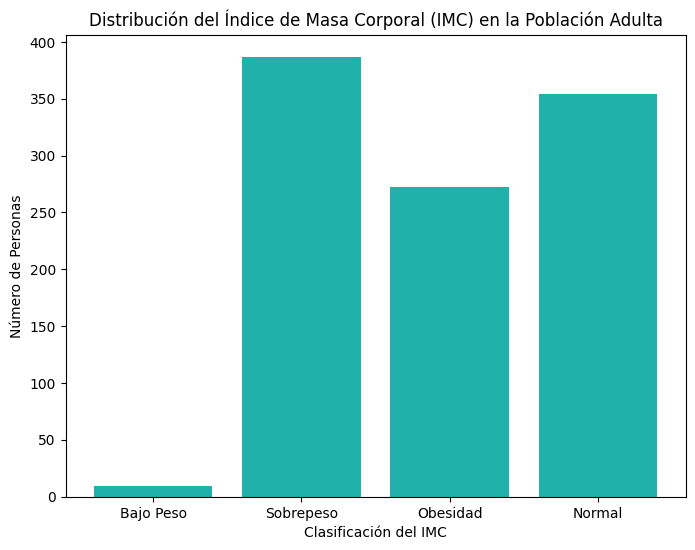

In [ ]:
#calcular el IMC usando el peso y la altura

adult_spark_df = adult_spark_df.withColumn("IMC", adult_spark_df["408_PESO_NETO_ENTERO"] / (adult_spark_df["410_TALLA_ENTERO"] / 100) ** 2)

# CLASIFICACION DEL IMC
adult_spark_df = adult_spark_df.withColumn("clasificacion_IMC",
                                           F.when((adult_spark_df["IMC"] < 18.5) & (adult_spark_df["IMC"] > 10), "Bajo Peso")
                                           .when((adult_spark_df["IMC"] >= 18.5) & (adult_spark_df["IMC"] <= 24.9), "Normal")
                                           .when((adult_spark_df["IMC"] >= 25) & (adult_spark_df["IMC"] <= 29.9), "Sobrepeso")
                                           .otherwise("Obesidad"))
imc_classification_count = adult_spark_df.groupBy("clasificacion_IMC").count()

#2
imc_classification_count.show()
imc_classification_count_pd = spark_to_pandas(imc_classification_count)

plt.figure(figsize=(8, 6))
plt.bar(imc_classification_count_pd["clasificacion_IMC"], imc_classification_count_pd["count"], color='lightseagreen')
plt.title('Distribución del Índice de Masa Corporal (IMC) en la Población Adulta')
plt.xlabel('Clasificación del IMC')
plt.ylabel('Número de Personas')
plt.show()

In [ ]:
#calcular el peso promedio de las prendas de ropa - xdddddd ya no se me ocurria nada
average_clothing_weight = adult_spark_df.agg(F.avg("409_PESO_PRENDAS_TOTAL").alias("peso_promedio_prendas"))

average_clothing_weight.show()

average_clothing_weight_pd = spark_to_pandas(average_clothing_weight)

+---------------------+
|peso_promedio_prendas|
+---------------------+
|    601.1457925636008|
+---------------------+



Diferencia entre el tiempo

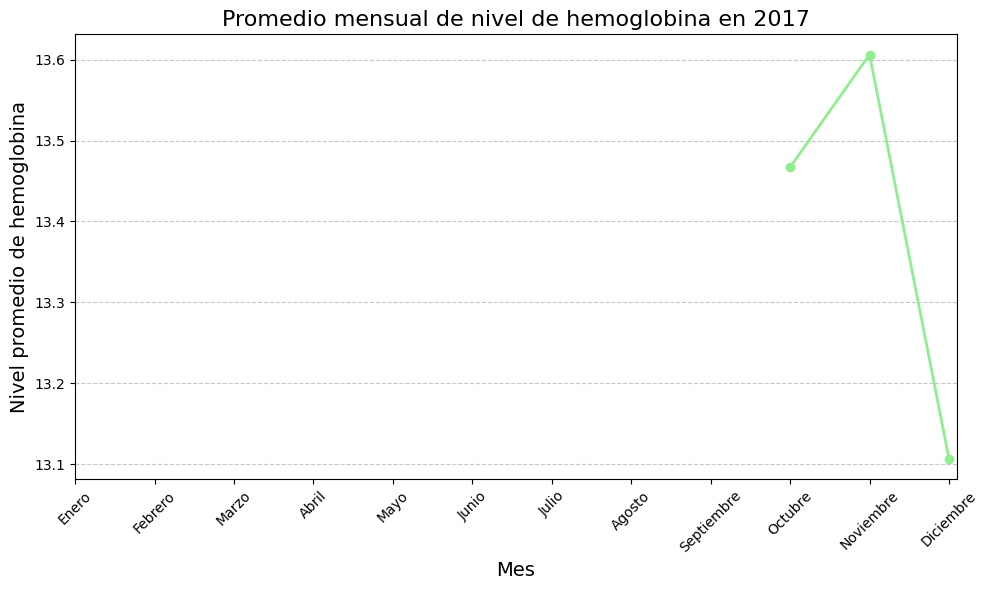

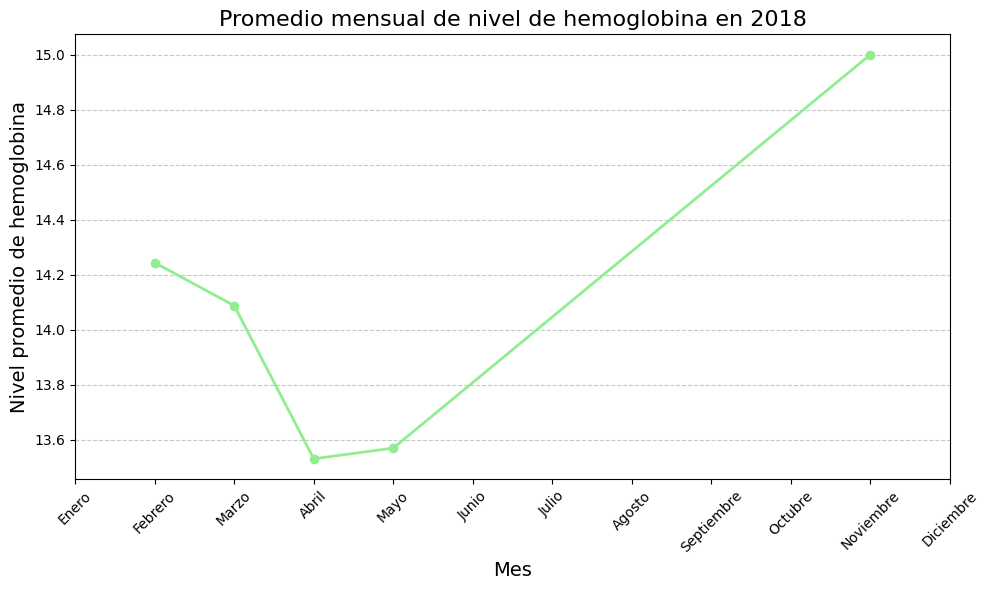

In [ ]:
# Niveles de hb a lo largo del año 2017 (en los meses que se hizo el sampleo)
hemoglobin_2017 = adult_df[adult_df['419_HEMOGLOBINA_AÑO'] == 2017]
monthly_avg_hemoglobin_entero = hemoglobin_2017.groupby('MES')['420_RESULTADO_HEMOGLOBINA_ENTERO'].mean()

plt.figure(figsize=(10, 6))
monthly_avg_hemoglobin_entero.plot(kind='line', marker='o', color='lightgreen', linewidth=2)
plt.title('Promedio mensual de nivel de hemoglobina en 2017', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Nivel promedio de hemoglobina', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=[
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# a lo largo de 2018 (igual)
hemoglobin_2018 = adult_df[adult_df['419_HEMOGLOBINA_AÑO'] == 2018]
monthly_avg_hemoglobin_entero = hemoglobin_2018.groupby('MES')['420_RESULTADO_HEMOGLOBINA_ENTERO'].mean()

plt.figure(figsize=(10, 6))
monthly_avg_hemoglobin_entero.plot(kind='line', marker='o', color='lightgreen', linewidth=2)
plt.title('Promedio mensual de nivel de hemoglobina en 2018', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Nivel promedio de hemoglobina', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=[
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


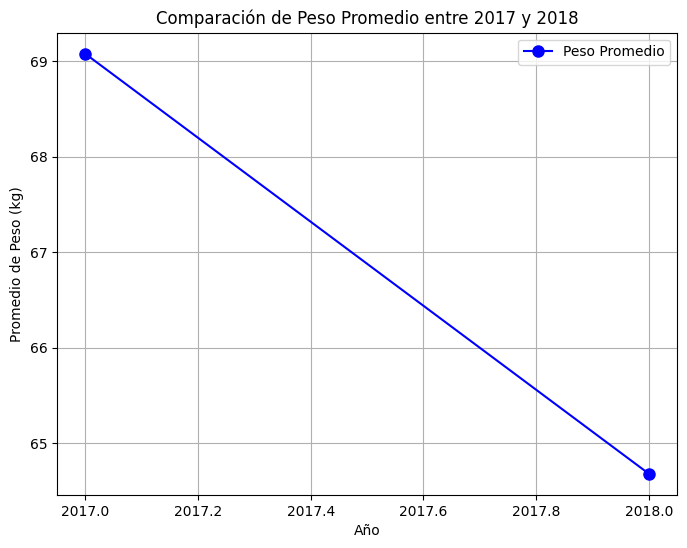

In [ ]:
# Promedio de peso por año
adult_spark_df_2017 = adult_spark_df.filter(F.col("404_EVALUACION_AÑO") == 2017)
adult_spark_df_2018 = adult_spark_df.filter(F.col("404_EVALUACION_AÑO") == 2018)
weight_2017_avg = adult_spark_df_2017.agg(F.avg("408_PESO_NETO_ENTERO").alias("peso_2017")).collect()[0]["peso_2017"]
weight_2018_avg = adult_spark_df_2018.agg(F.avg("408_PESO_NETO_ENTERO").alias("peso_2018")).collect()[0]["peso_2018"]

# Datos para graficar
weight_values = [weight_2017_avg, weight_2018_avg]
years = [2017, 2018]

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(years, weight_values, marker='o', color='b', linestyle='-', markersize=8, label='Peso Promedio')
plt.title('Comparación de Peso Promedio entre 2017 y 2018')
plt.xlabel('Año')
plt.ylabel('Promedio de Peso (kg)')
plt.grid(True)
plt.legend()
plt.show()

**Subir** informacion a un **archivo**

Ejemplo:

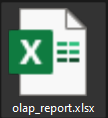

In [ ]:
# Agregación de métricas clave
# Cálculo de métricas por género y rango etario
olap_report = adult_spark_df.groupBy("rango_edad", "401_SEXO").agg(
    F.avg("420_RESULTADO_HEMOGLOBINA_ENTERO").alias("promedio_hemoglobina"),
    F.sum("anemia").alias("casos_anemia"),
    F.sum("hipertension").alias("casos_hipertension"),
    F.count("*").alias("total_registros")
)

# Cálculo de proporciones
olap_report = olap_report.withColumn(
    "proporcion_anemia",
    (F.col("casos_anemia") / F.col("total_registros")) * 100
).withColumn(
    "proporcion_hipertension",
    (F.col("casos_hipertension") / F.col("total_registros")) * 100
)

olap_report.show()

# Convertir a pandas para exportar o visualizar
olap_report_pd = olap_report.toPandas()
olap_report_pd.to_excel("olap_report.xlsx", index=False)

# Cargar los datos OLAP desde el archivo generado
olap_report_pd = pd.read_excel("olap_report.xlsx")

# Configurar el título del dashboard
st.title("Dashboard de Análisis Nutricional y Salud")

# Selector de rango de edad
selected_age_group = st.selectbox(
    "Seleccione un rango de edad:",
    olap_report_pd['rango_edad'].unique()
)

# Filtrar los datos por rango de edad seleccionado
filtered_data = olap_report_pd[olap_report_pd['rango_edad'] == selected_age_group]

# Mostrar una tabla de datos
st.subheader("Datos Filtrados:")
st.dataframe(filtered_data)

# Mostrar insights generales
st.subheader("Insights Generales")
st.write(f"Promedio de Hemoglobina por Género en el rango de edad {selected_age_group}:")
for _, row in filtered_data.iterrows():
    st.write(f"- Género {int(row['401_SEXO'])}: {row['promedio_hemoglobina']:.2f} g/dL")

+----------+--------+--------------------+------------+------------------+---------------+------------------+-----------------------+
|rango_edad|401_SEXO|promedio_hemoglobina|casos_anemia|casos_hipertension|total_registros| proporcion_anemia|proporcion_hipertension|
+----------+--------+--------------------+------------+------------------+---------------+------------------+-----------------------+
|     40-59|       2|  12.926739926739927|           0|                13|            273|               0.0|      4.761904761904762|
|     30-39|       2|  12.370860927152318|           0|                 3|            151|               0.0|     1.9867549668874174|
|     30-39|       1|  14.846846846846846|           2|                 3|            111|1.8018018018018018|     2.7027027027027026|
|       60+|       2|  12.517241379310345|           0|                 0|             29|               0.0|                    0.0|
|     20-29|       1|  14.917525773195877|           1|       

2024-11-24 09:24:50.788 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 09:24:50.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 09:24:50.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 09:24:50.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 09:24:50.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 09:24:50.818 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 09:24:50.824 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 09:24:50.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar